In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skimage.measure import label, regionprops
from scipy.ndimage import binary_dilation
from scipy.ndimage import gaussian_filter

/Users/kuanlin/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


## Load in the Image

In [2]:
img1 = plt.imread("./Txn_25min_s3c1.tif")

img2 = plt.imread("./Txn_25min_s3c2.tif")

## View the Image

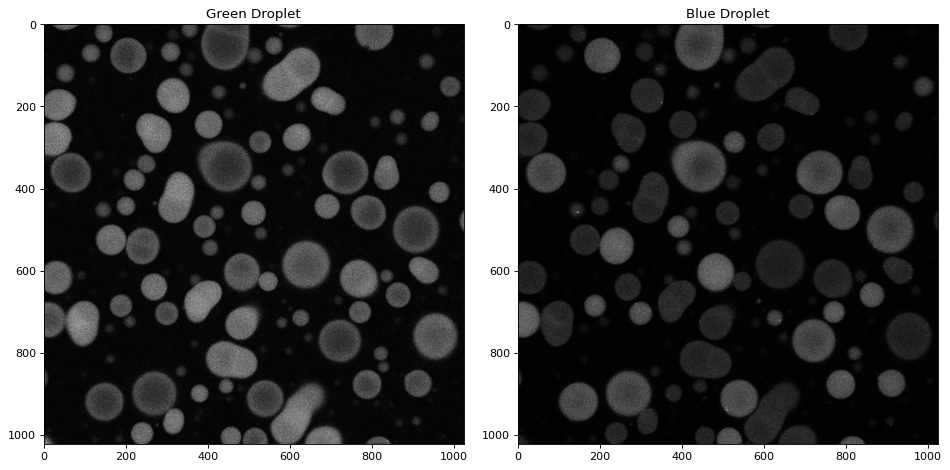

In [3]:
plt.figure(figsize = (12, 6), dpi = 80)

plt.subplot(1, 2, 1)
plt.title("Green Droplet")
plt.imshow(img1, cmap = 'gray')

plt.subplot(1, 2, 2)
plt.title("Blue Droplet")
plt.imshow(img2, cmap = 'gray')

plt.tight_layout()
plt.show()

## Droplet Detection

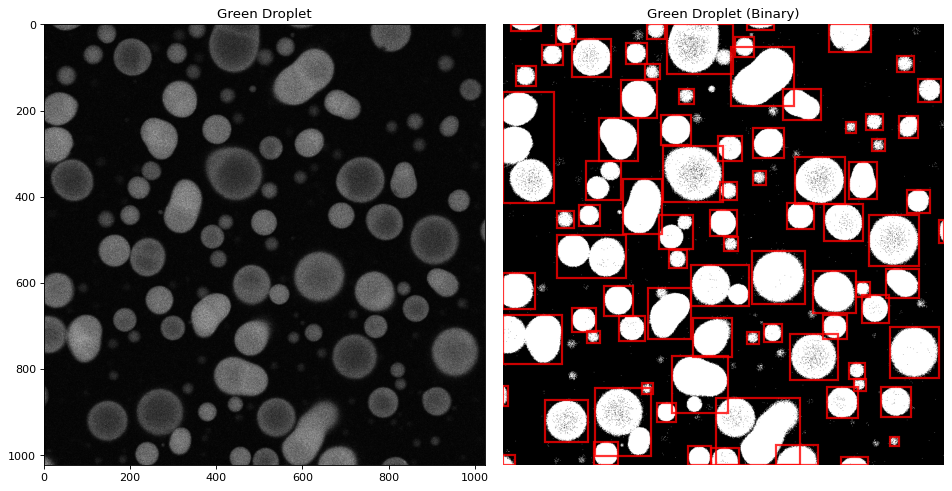

In [4]:
# Create Binary for better signal to noise
binary = img1 > (img1.mean() + 0.0*img1.std())

# use labeling function to identify connected blobs
label_im = label(binary)
blob_lists = regionprops(label_im)

# Remove small blobs
droplets = [i for i in blob_lists if i.area > 200]

plt.figure(figsize = (12, 6), dpi = 80)

plt.subplot(1, 2, 1)
plt.title("Green Droplet")
plt.imshow(img1, cmap = 'gray')

ax = plt.subplot(1, 2, 2)
plt.title("Green Droplet (Binary)")
plt.imshow(binary, cmap = 'gray')
for i in droplets:
    minr, minc, maxr, maxc = i.bbox
    rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2, alpha=.8)
    ax.add_patch(rect)
    ax.set_axis_off()

plt.tight_layout()
plt.show()

## Value Extraction

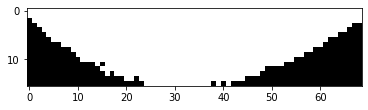

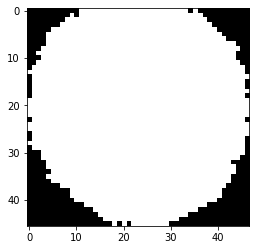

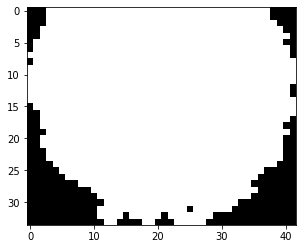

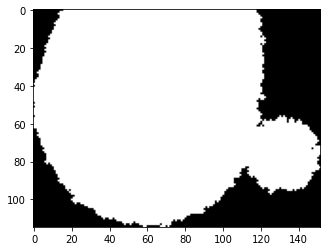

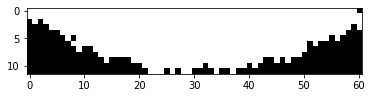

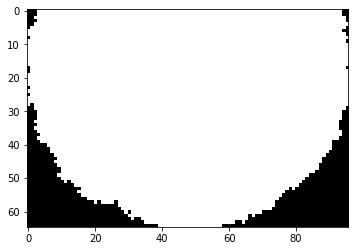

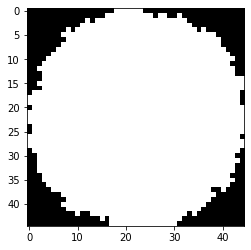

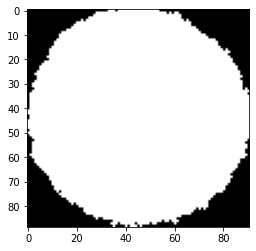

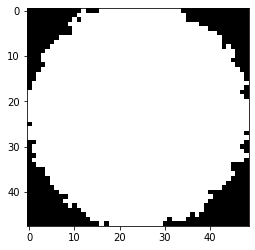

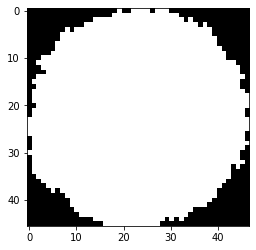

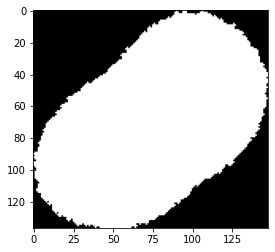

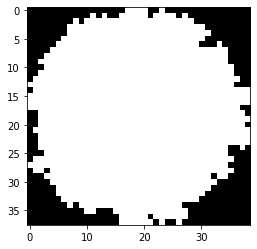

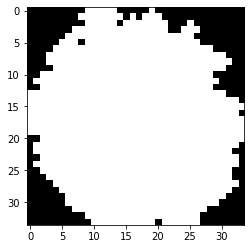

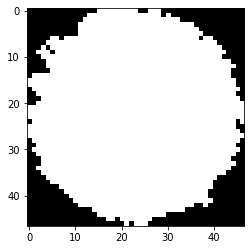

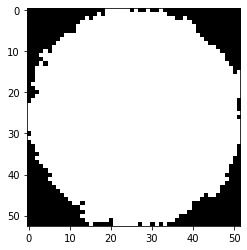

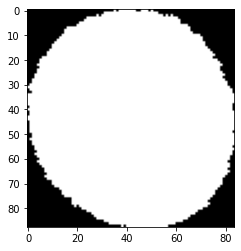

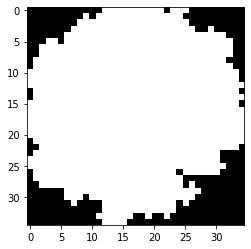

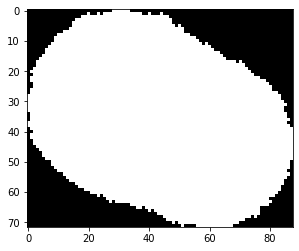

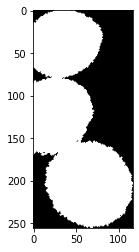

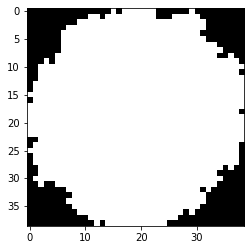

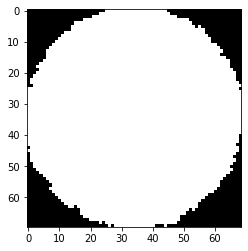

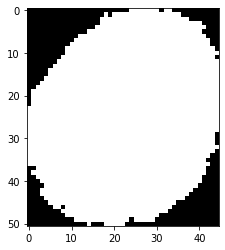

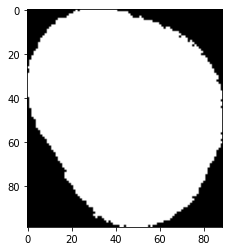

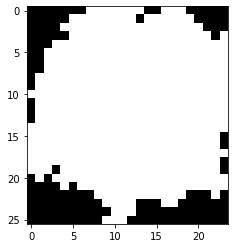

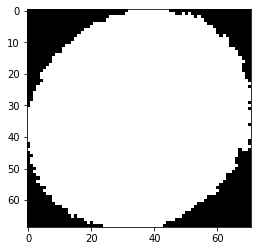

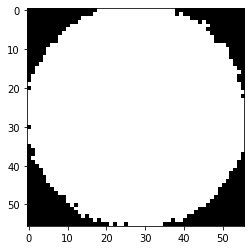

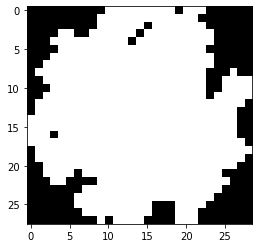

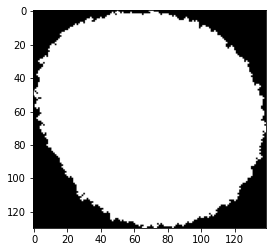

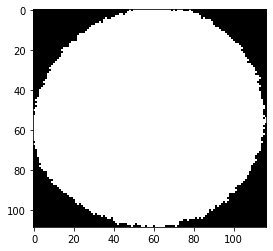

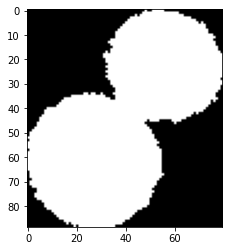

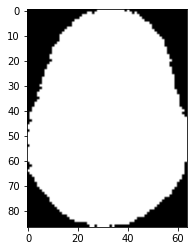

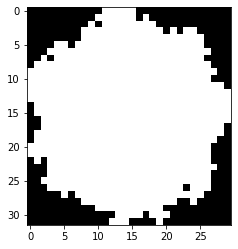

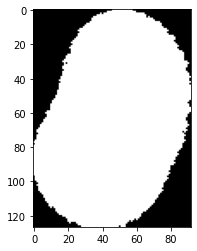

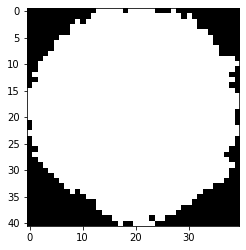

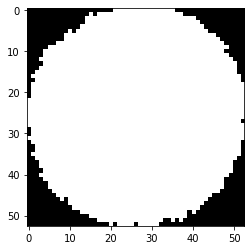

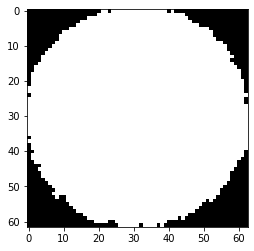

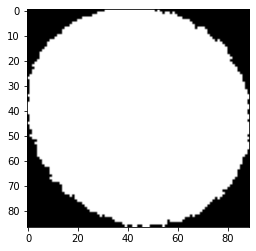

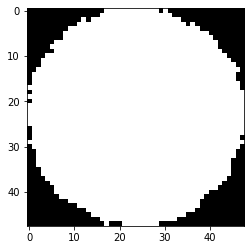

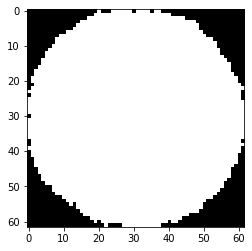

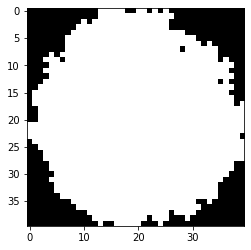

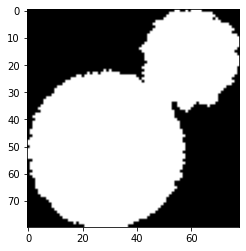

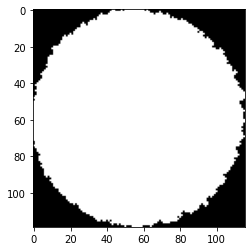

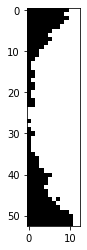

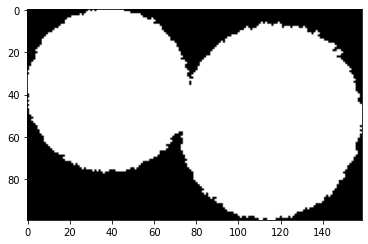

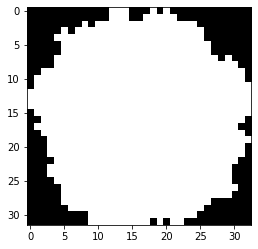

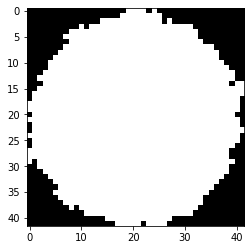

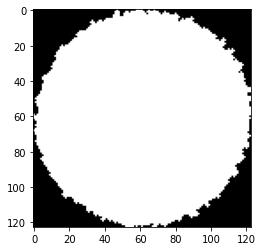

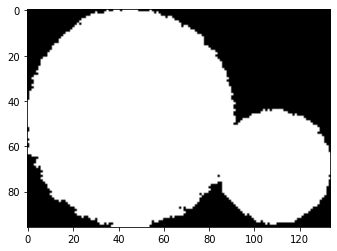

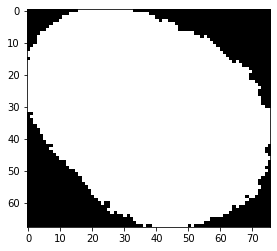

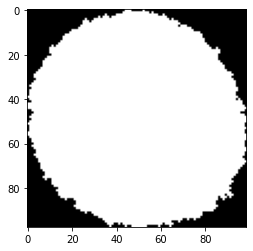

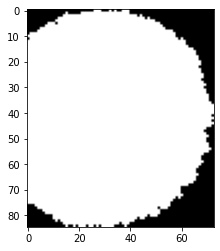

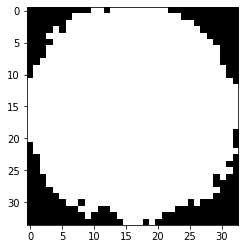

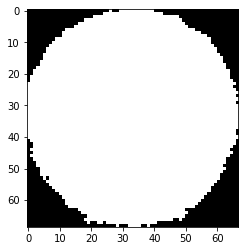

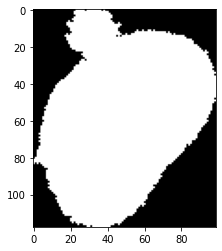

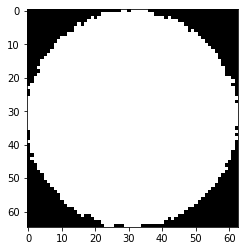

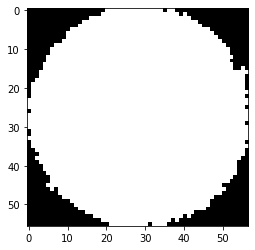

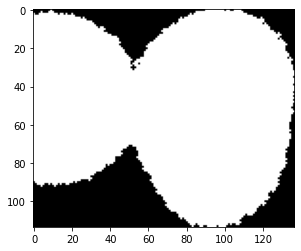

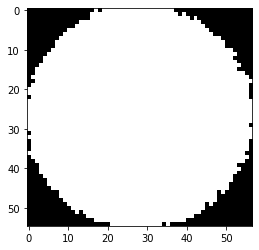

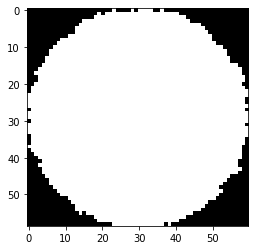

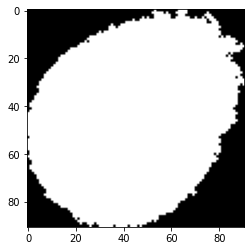

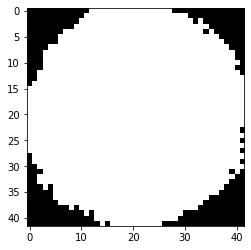

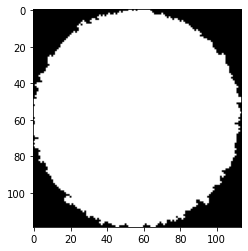

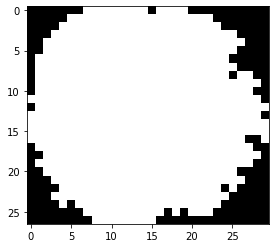

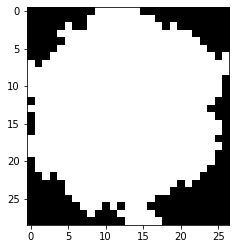

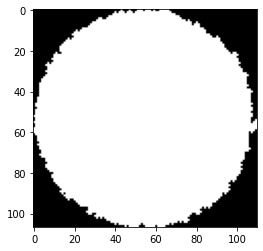

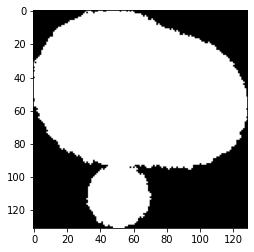

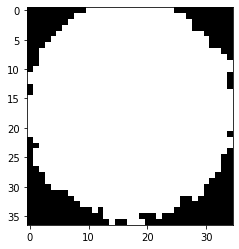

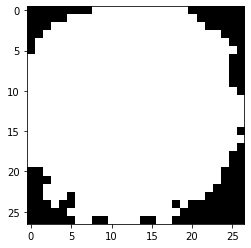

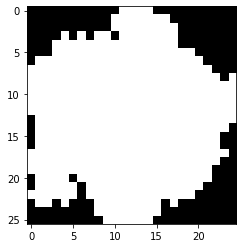

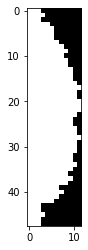

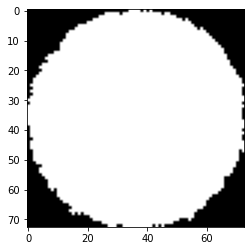

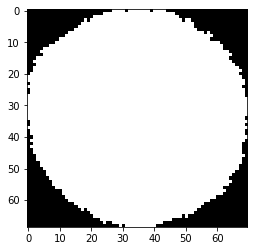

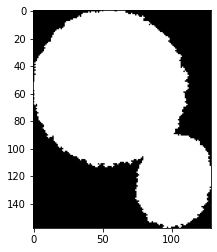

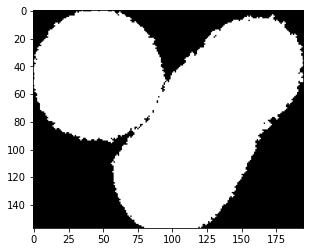

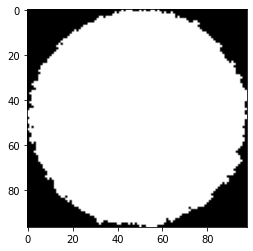

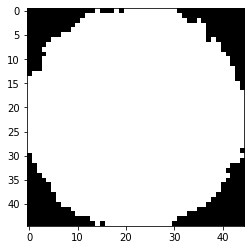

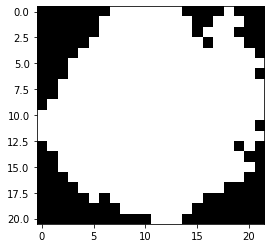

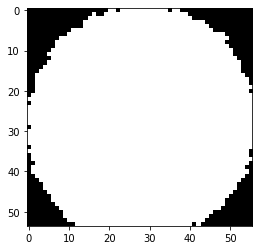

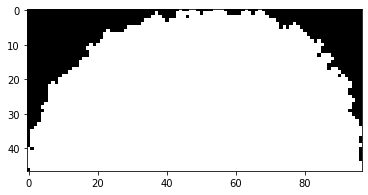

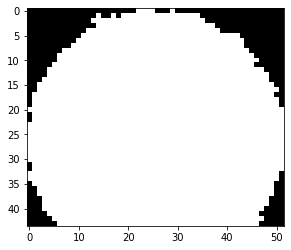

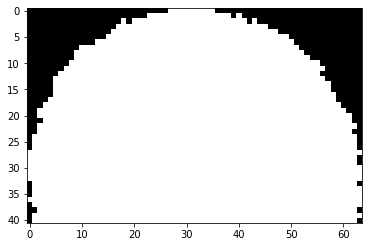

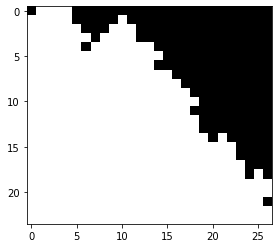

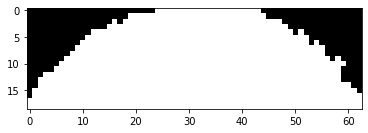

In [5]:
val1, val2 = [], []

for droplet in droplets:
    # view the blob
    plt.imshow(binary_dilation(droplet.image), cmap = 'gray')
    plt.show()
    
    # get the boundary
    minr, minc, maxr, maxc = droplet.bbox
    
    # img1 values
    blob_img = img1[minr:maxr, minc:maxc]
    vals = blob_img[binary_dilation(droplet.image)]
    val1.append(vals.flatten())
    
    # img2 values
    blob_img = img2[minr:maxr, minc:maxc]
    vals = blob_img[binary_dilation(droplet.image)]
    val2.append(vals.flatten())
    
val1 = [val for ary in val1 for val in ary]
val2 = [val for ary in val2 for val in ary]


## Scatter Plot

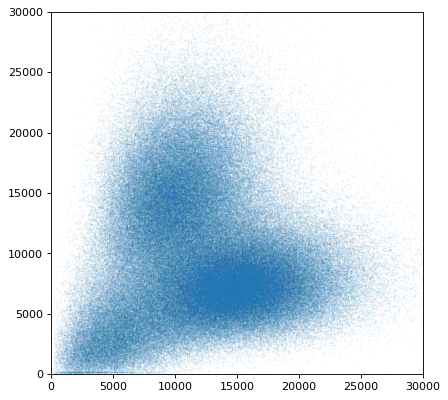

In [6]:
plt.figure(figsize=(6, 6), dpi = 80)
plt.scatter(val1, val2, alpha = .1, s = .1)
plt.xlim(0, 30000)
plt.ylim(0, 30000)
plt.show()

## Export to csv file

In [7]:
df = pd.DataFrame({"Txn_25min_s3c1": val1, "Txn_25min_s3c2": val2})
df.head()

,Txn_25min_s3c1,Txn_25min_s3c2
0,6045,3597
1,7413,4954
2,4255,1640
3,6585,6092
4,11303,3392


In [8]:
df.to_csv("Txn_25min_s3.csv")

# Pre-Txn Example

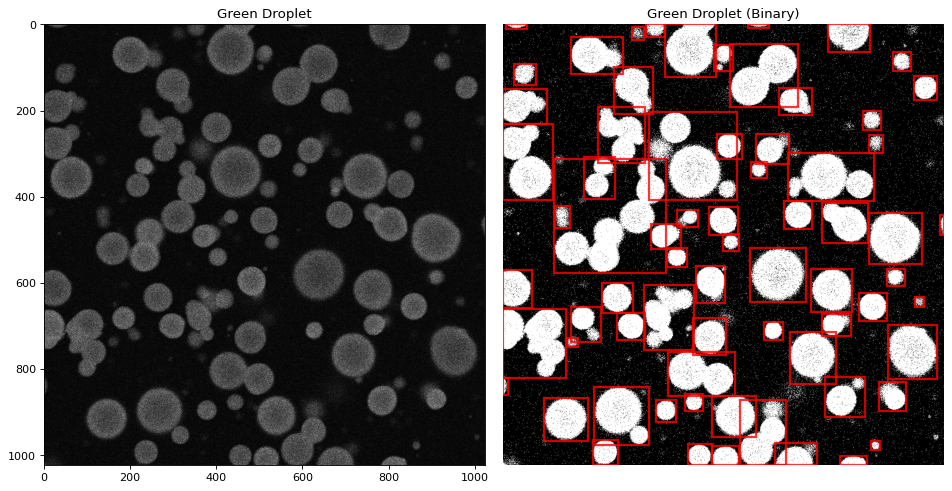

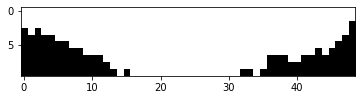

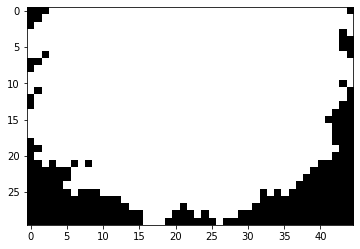

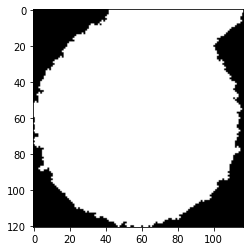

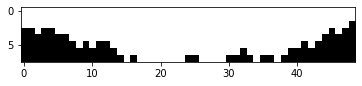

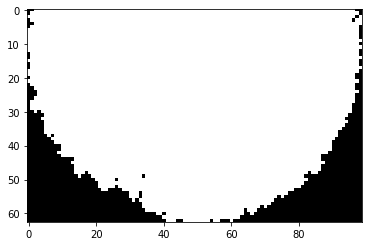

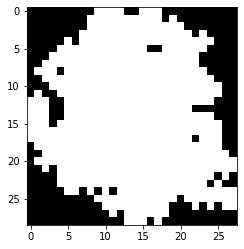

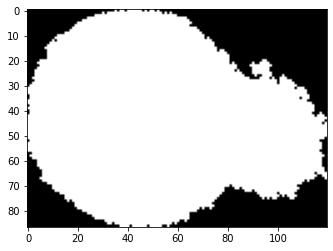

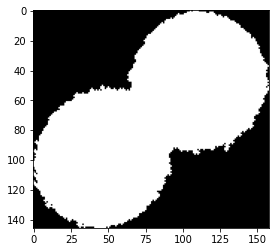

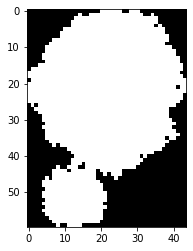

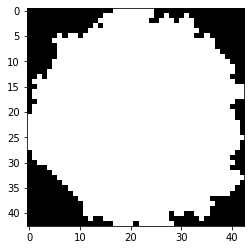

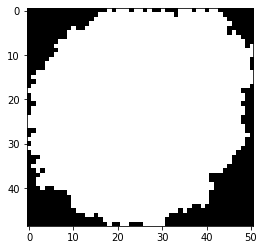

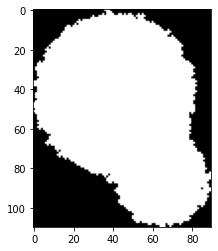

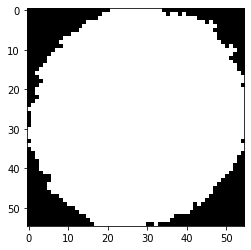

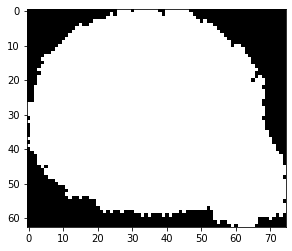

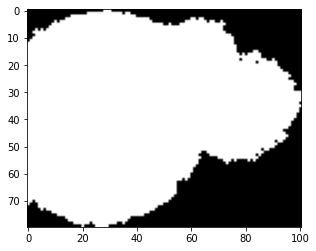

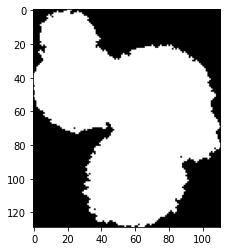

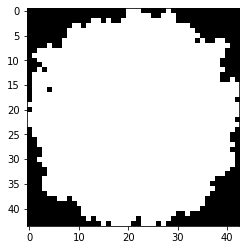

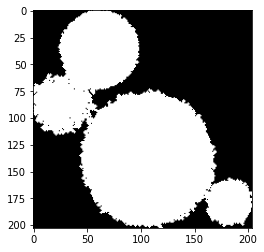

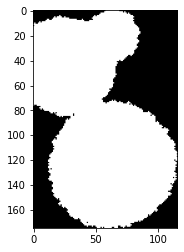

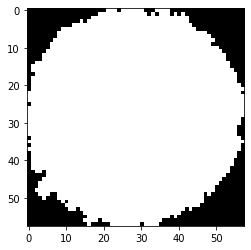

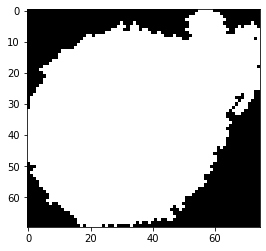

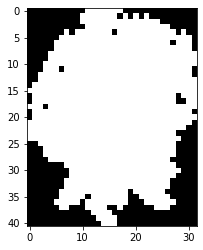

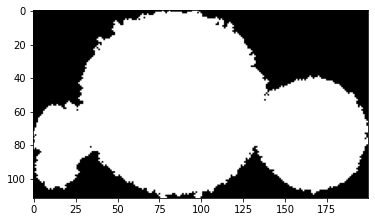

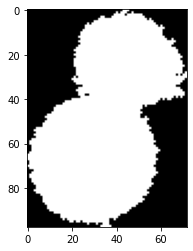

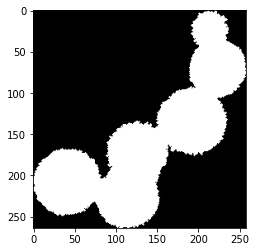

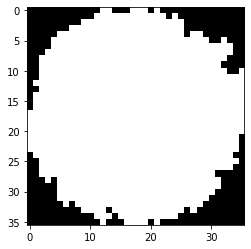

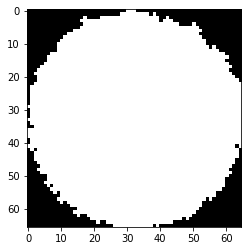

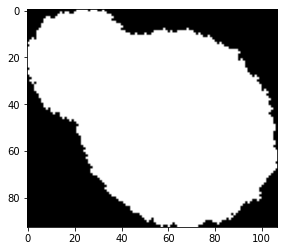

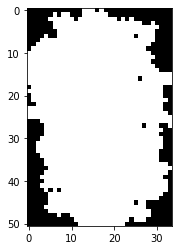

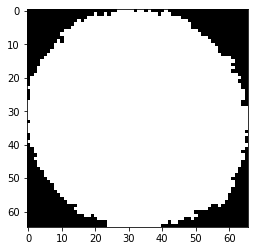

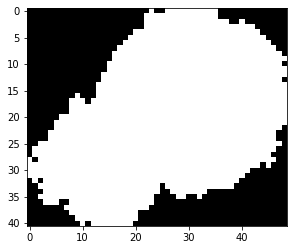

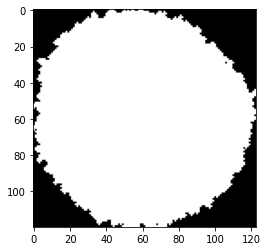

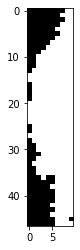

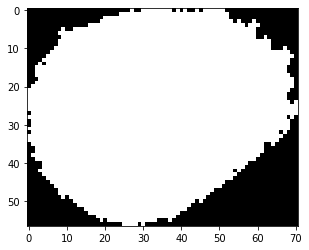

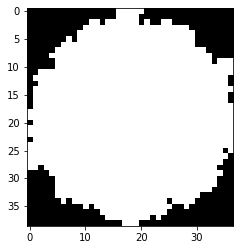

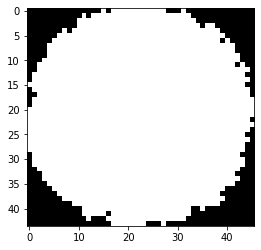

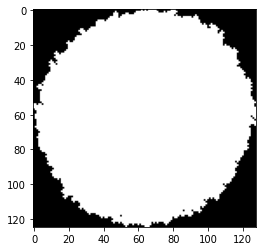

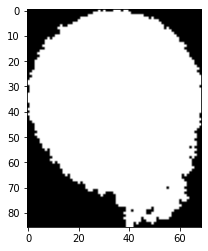

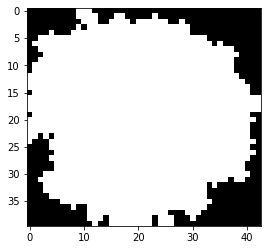

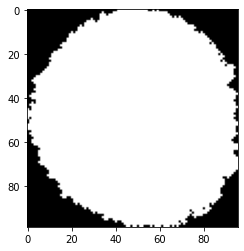

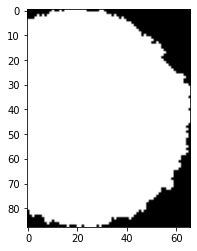

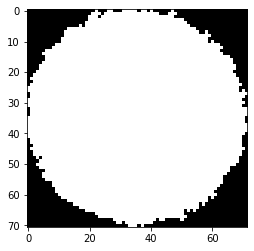

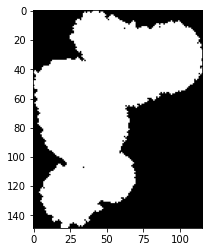

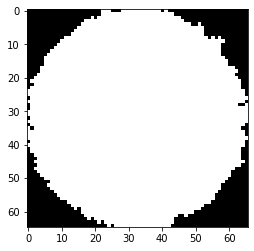

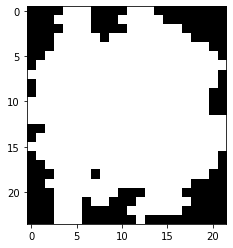

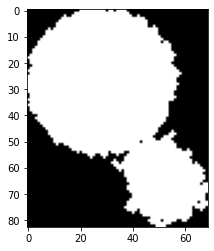

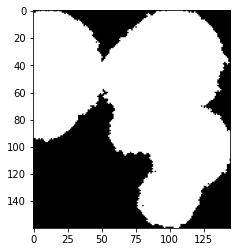

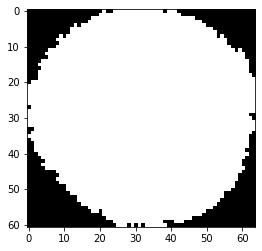

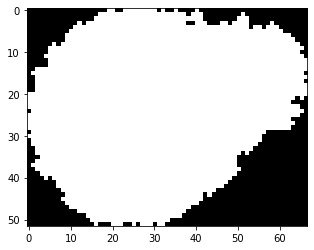

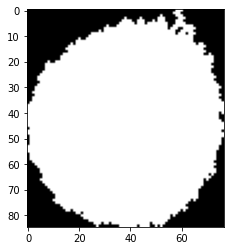

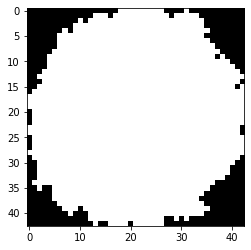

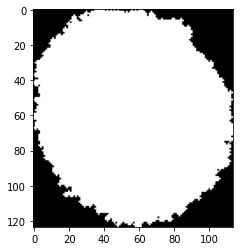

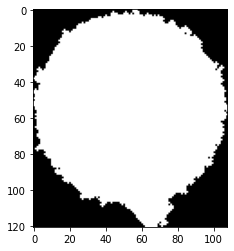

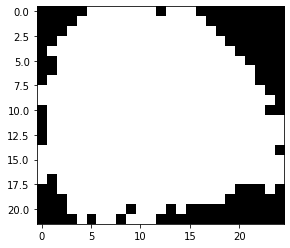

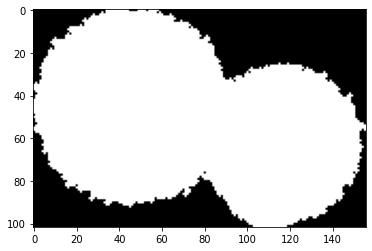

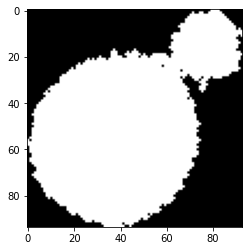

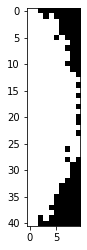

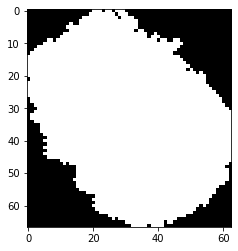

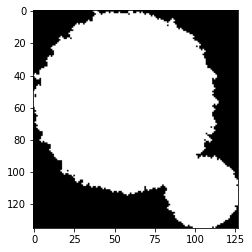

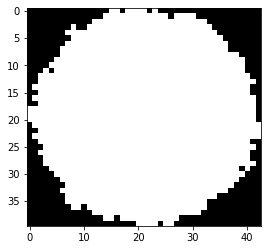

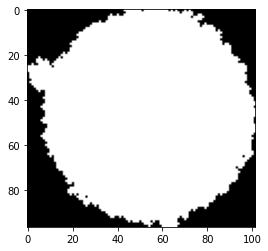

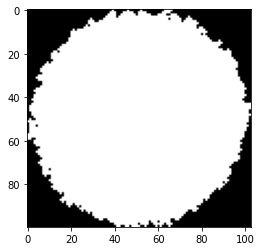

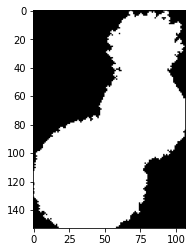

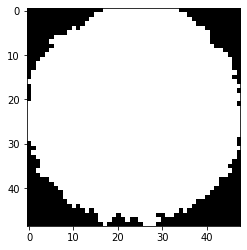

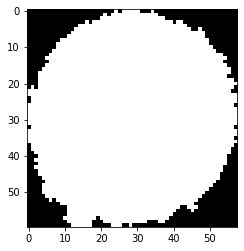

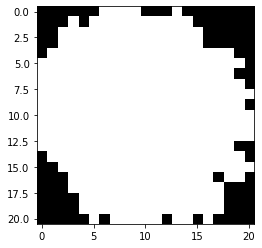

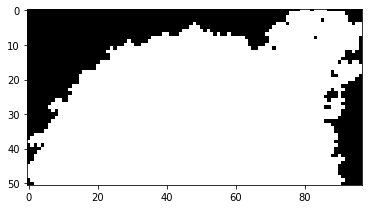

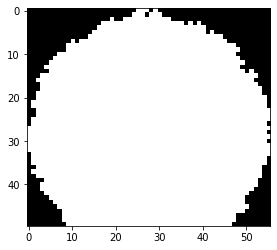

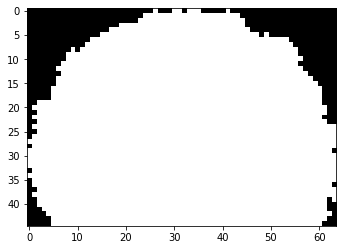

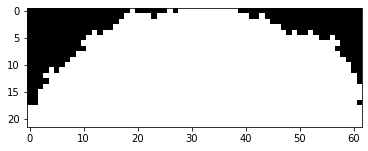

In [9]:
img1 = plt.imread("./Pretxn_s3c1.tif")

img2 = plt.imread("./Pretxn_s3c2.tif")

# Create Binary for better signal to noise
binary = img1 > (img1.mean() + 0.0*img1.std())

# use labeling function to identify connected blobs
label_im = label(binary)
blob_lists = regionprops(label_im)

# Remove small blobs
droplets = [i for i in blob_lists if i.area > 200]

plt.figure(figsize = (12, 6), dpi = 80)

plt.subplot(1, 2, 1)
plt.title("Green Droplet")
plt.imshow(img1, cmap = 'gray')

ax = plt.subplot(1, 2, 2)
plt.title("Green Droplet (Binary)")
plt.imshow(binary, cmap = 'gray')
for i in droplets:
    minr, minc, maxr, maxc = i.bbox
    rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2, alpha=.8)
    ax.add_patch(rect)
    ax.set_axis_off()

plt.tight_layout()
plt.show()

val1, val2 = [], []

for droplet in droplets:
    # view the blob
    plt.imshow(binary_dilation(droplet.image), cmap = 'gray')
    plt.show()
    
    # get the boundary
    minr, minc, maxr, maxc = droplet.bbox
    
    # img1 values
    blob_img = img1[minr:maxr, minc:maxc]
    vals = blob_img[binary_dilation(droplet.image)]
    val1.append(vals.flatten())
    
    # img2 values
    blob_img = img2[minr:maxr, minc:maxc]
    vals = blob_img[binary_dilation(droplet.image)]
    val2.append(vals.flatten())

val1 = [val for ary in val1 for val in ary]
val2 = [val for ary in val2 for val in ary]

## Scatter Plot

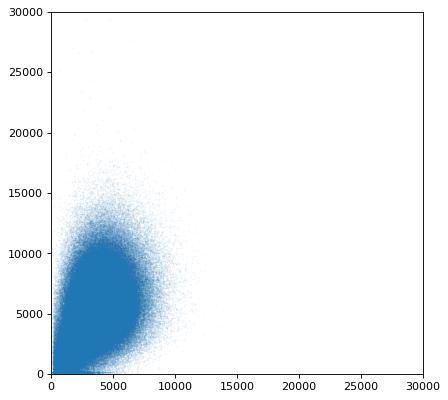

In [10]:
plt.figure(figsize=(6, 6), dpi = 80)
plt.scatter(val1, val2, alpha = .1, s = .1)
plt.xlim(0, 30000)
plt.ylim(0, 30000)
plt.show()

## Export to csv file

In [11]:
df = pd.DataFrame({"Pretxn_s3c1": val1, "Pretxn_s3c2": val2})
df.head()

,Pretxn_s3c1,Pretxn_s3c2
0,637,727
1,3542,3283
2,3133,4315
3,3153,6568
4,3278,3318


In [12]:
df.to_csv("Pretxn_s3.csv")